In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import target encoder
from category_encoders import TargetEncoder, WOEEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import nltk
import nltk

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS

# import regular expression
import re

# import ast
import ast

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import KNNimputer
from sklearn.impute import KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

# import GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV

# import statsmodels
import statsmodels.api as sma

# Import Kmeans
from sklearn.cluster import KMeans

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import Catboost Classifier
from catboost import CatBoostClassifier

import catboost as cb

In [2]:
pd.set_option('display.max_columns', 40)

xtrain = pd.read_csv('xtrain1.csv')
xtest = pd.read_csv('xtest1.csv')
ytrain = pd.read_csv('ytrain1.csv')
ytest = pd.read_csv('ytest1.csv')


In [3]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data 

performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','Precision_Score','Recall_Score','AUC_Score','Remarks'])

def model_performance(model, name, xtrain = xtrain , xtest = xtest):
    global performance_df
    
    # predicting train and test data
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob = model.predict_proba(xtest)[:,1]
    
    # calculating metrics for both train and test data
    
    acc_train = round(accuracy_score(ytrain,pred_train),2)*100
    acc_test = round(accuracy_score(ytest,pred_test),2)*100
    f1_train = round(f1_score(ytrain,pred_train),2)
    f1_test = round(f1_score(ytest,pred_test),2)
    precision = round(precision_score(ytest,pred_test),2)
    recall = round(recall_score(ytest,pred_test),2)
    auc_score = round(roc_auc_score(ytest,pred_prob),4)

    # defining function for remarks
    
    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 3 or train_acc > 95:
            return 'Over Fit'
        elif train_acc < 65 or test_acc < 65:
            return 'Under Fit'
        else:
            return 'Good Fit'

    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                            'Precision_Score':precision , 'Recall_Score':recall,
                                           'AUC_Score':auc_score,'Remarks':remark(acc_train,acc_test)},ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))

    print('Train Report :\n',classification_report(ytrain,pred_train))
    print('Test Report :\n',classification_report(ytest,pred_test))

In [4]:
# Craeting a user defined function to highlight the rows 

def highlight_row(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['backkground-white : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

Train Report :
               precision    recall  f1-score   support

           0       0.66      0.69      0.67    114747
           1       0.68      0.64      0.66    114747

    accuracy                           0.67    229494
   macro avg       0.67      0.67      0.67    229494
weighted avg       0.67      0.67      0.67    229494

Test Report :
               precision    recall  f1-score   support

           0       0.65      0.69      0.67     49177
           1       0.67      0.63      0.65     49177

    accuracy                           0.66     98354
   macro avg       0.66      0.66      0.66     98354
weighted avg       0.66      0.66      0.66     98354



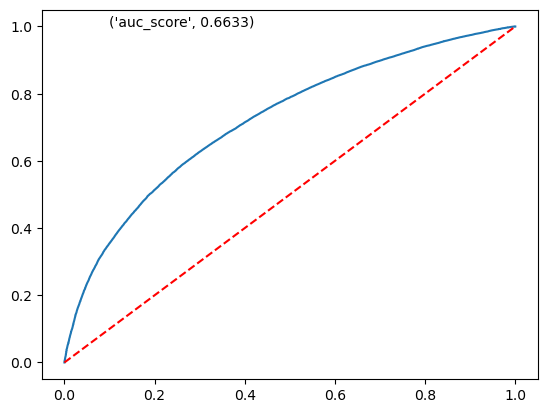

In [5]:
# logistic regression

model_lrs = LogisticRegression().fit(xtrain,ytrain)

model_performance(model_lrs,'Logistic Regression sklearn')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114747
           1       1.00      1.00      1.00    114747

    accuracy                           1.00    229494
   macro avg       1.00      1.00      1.00    229494
weighted avg       1.00      1.00      1.00    229494

Test Report :
               precision    recall  f1-score   support

           0       0.69      0.70      0.69     49177
           1       0.70      0.68      0.69     49177

    accuracy                           0.69     98354
   macro avg       0.69      0.69      0.69     98354
weighted avg       0.69      0.69      0.69     98354



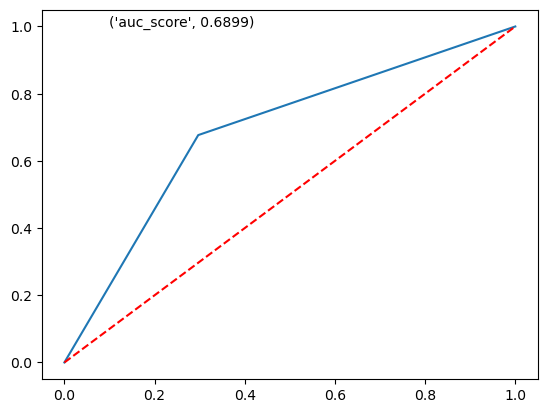

In [6]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt,'DecisionTree Model without tuning')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114747
           1       1.00      1.00      1.00    114747

    accuracy                           1.00    229494
   macro avg       1.00      1.00      1.00    229494
weighted avg       1.00      1.00      1.00    229494

Test Report :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79     49177
           1       0.82      0.72      0.76     49177

    accuracy                           0.78     98354
   macro avg       0.78      0.78      0.78     98354
weighted avg       0.78      0.78      0.78     98354



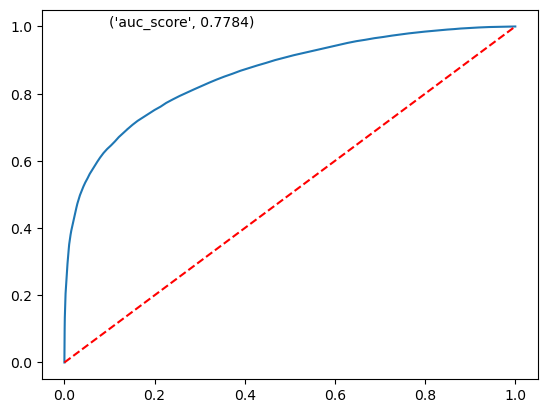

In [7]:
# Random Forest without tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf,'Random Forest without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.70      0.74      0.72    114747
           1       0.72      0.69      0.71    114747

    accuracy                           0.71    229494
   macro avg       0.71      0.71      0.71    229494
weighted avg       0.71      0.71      0.71    229494

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.74      0.72     49177
           1       0.72      0.69      0.71     49177

    accuracy                           0.71     98354
   macro avg       0.71      0.71      0.71     98354
weighted avg       0.71      0.71      0.71     98354



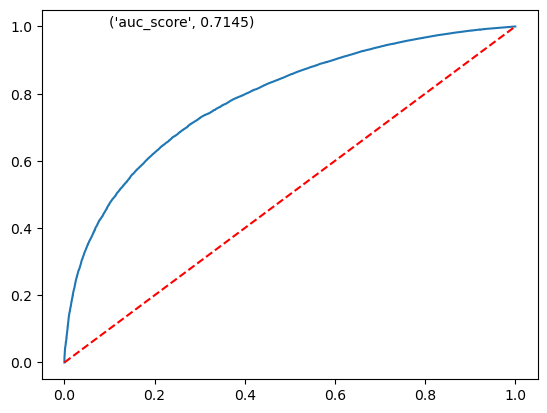

In [8]:
# AdaBoost without tuning

model_ab = AdaBoostClassifier().fit(xtrain,ytrain)

model_performance(model_ab,'AdaBoost without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.76    114747
           1       0.77      0.71      0.74    114747

    accuracy                           0.75    229494
   macro avg       0.75      0.75      0.75    229494
weighted avg       0.75      0.75      0.75    229494

Test Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.76     49177
           1       0.77      0.71      0.74     49177

    accuracy                           0.75     98354
   macro avg       0.75      0.75      0.75     98354
weighted avg       0.75      0.75      0.75     98354



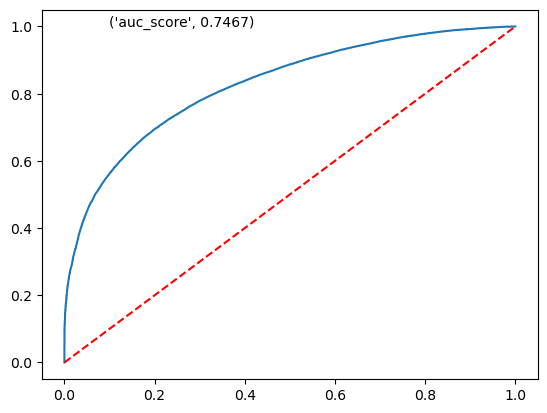

In [9]:
# Gradient Boosting without tuning

model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb,'GradientBoosting without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.73      0.81      0.77    114747
           1       0.79      0.70      0.74    114747

    accuracy                           0.75    229494
   macro avg       0.76      0.75      0.75    229494
weighted avg       0.76      0.75      0.75    229494

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     49177
           1       0.77      0.68      0.72     49177

    accuracy                           0.74     98354
   macro avg       0.74      0.74      0.74     98354
weighted avg       0.74      0.74      0.74     98354



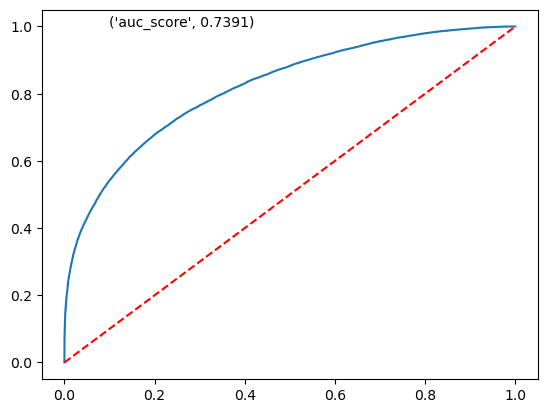

In [10]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(xtrain,ytrain)

model_performance(model_nn , 'Neural Network')

Train Report :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80    114747
           1       0.83      0.73      0.78    114747

    accuracy                           0.79    229494
   macro avg       0.79      0.79      0.79    229494
weighted avg       0.79      0.79      0.79    229494

Test Report :
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     49177
           1       0.81      0.71      0.76     49177

    accuracy                           0.77     98354
   macro avg       0.78      0.77      0.77     98354
weighted avg       0.78      0.77      0.77     98354



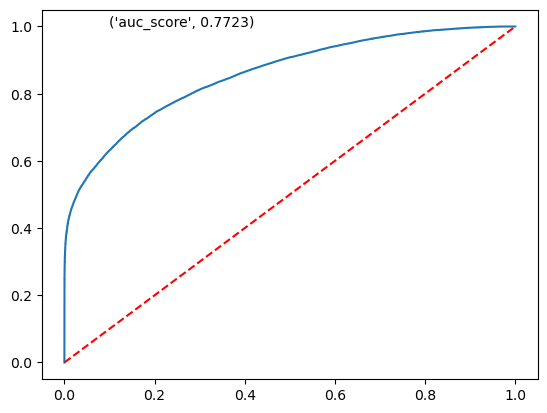

In [11]:
# XGB without tuning

model_xgb = XGBClassifier().fit(xtrain,ytrain)

model_performance(model_xgb,'Xtreme Gradient Boosting without tuning')

Learning rate set to 0.10495
0:	learn: 0.6722034	total: 197ms	remaining: 3m 17s
1:	learn: 0.6558694	total: 246ms	remaining: 2m 2s
2:	learn: 0.6406850	total: 288ms	remaining: 1m 35s
3:	learn: 0.6298743	total: 318ms	remaining: 1m 19s
4:	learn: 0.6188667	total: 347ms	remaining: 1m 8s
5:	learn: 0.6105981	total: 376ms	remaining: 1m 2s
6:	learn: 0.6014440	total: 405ms	remaining: 57.4s
7:	learn: 0.5956369	total: 436ms	remaining: 54s
8:	learn: 0.5886536	total: 465ms	remaining: 51.2s
9:	learn: 0.5828498	total: 494ms	remaining: 48.9s
10:	learn: 0.5772753	total: 523ms	remaining: 47s
11:	learn: 0.5732759	total: 551ms	remaining: 45.4s
12:	learn: 0.5701960	total: 579ms	remaining: 44s
13:	learn: 0.5662915	total: 608ms	remaining: 42.8s
14:	learn: 0.5614275	total: 638ms	remaining: 41.9s
15:	learn: 0.5592325	total: 677ms	remaining: 41.6s
16:	learn: 0.5537981	total: 704ms	remaining: 40.7s
17:	learn: 0.5509375	total: 731ms	remaining: 39.9s
18:	learn: 0.5461221	total: 759ms	remaining: 39.2s
19:	learn: 0.54

162:	learn: 0.4686838	total: 4.88s	remaining: 25.1s
163:	learn: 0.4684534	total: 4.91s	remaining: 25s
164:	learn: 0.4683533	total: 4.94s	remaining: 25s
165:	learn: 0.4679541	total: 4.97s	remaining: 25s
166:	learn: 0.4678734	total: 4.99s	remaining: 24.9s
167:	learn: 0.4676344	total: 5.02s	remaining: 24.9s
168:	learn: 0.4675202	total: 5.05s	remaining: 24.8s
169:	learn: 0.4674075	total: 5.08s	remaining: 24.8s
170:	learn: 0.4672648	total: 5.11s	remaining: 24.8s
171:	learn: 0.4671296	total: 5.13s	remaining: 24.7s
172:	learn: 0.4669200	total: 5.16s	remaining: 24.7s
173:	learn: 0.4667765	total: 5.19s	remaining: 24.6s
174:	learn: 0.4667106	total: 5.21s	remaining: 24.6s
175:	learn: 0.4665708	total: 5.24s	remaining: 24.5s
176:	learn: 0.4663448	total: 5.27s	remaining: 24.5s
177:	learn: 0.4661652	total: 5.3s	remaining: 24.5s
178:	learn: 0.4660089	total: 5.32s	remaining: 24.4s
179:	learn: 0.4657867	total: 5.35s	remaining: 24.4s
180:	learn: 0.4656328	total: 5.38s	remaining: 24.3s
181:	learn: 0.46550

323:	learn: 0.4513837	total: 9.62s	remaining: 20.1s
324:	learn: 0.4510147	total: 9.65s	remaining: 20s
325:	learn: 0.4509503	total: 9.67s	remaining: 20s
326:	learn: 0.4508454	total: 9.7s	remaining: 20s
327:	learn: 0.4507659	total: 9.73s	remaining: 19.9s
328:	learn: 0.4507039	total: 9.77s	remaining: 19.9s
329:	learn: 0.4506731	total: 9.8s	remaining: 19.9s
330:	learn: 0.4505958	total: 9.82s	remaining: 19.9s
331:	learn: 0.4505274	total: 9.86s	remaining: 19.8s
332:	learn: 0.4504797	total: 9.89s	remaining: 19.8s
333:	learn: 0.4503552	total: 9.91s	remaining: 19.8s
334:	learn: 0.4502947	total: 9.94s	remaining: 19.7s
335:	learn: 0.4501906	total: 9.97s	remaining: 19.7s
336:	learn: 0.4500945	total: 10s	remaining: 19.7s
337:	learn: 0.4500130	total: 10s	remaining: 19.6s
338:	learn: 0.4499012	total: 10.1s	remaining: 19.6s
339:	learn: 0.4498136	total: 10.1s	remaining: 19.6s
340:	learn: 0.4497637	total: 10.1s	remaining: 19.6s
341:	learn: 0.4496934	total: 10.2s	remaining: 19.5s
342:	learn: 0.4495970	to

488:	learn: 0.4400072	total: 14.3s	remaining: 14.9s
489:	learn: 0.4399565	total: 14.3s	remaining: 14.9s
490:	learn: 0.4399069	total: 14.3s	remaining: 14.9s
491:	learn: 0.4398241	total: 14.4s	remaining: 14.8s
492:	learn: 0.4397802	total: 14.4s	remaining: 14.8s
493:	learn: 0.4397371	total: 14.4s	remaining: 14.8s
494:	learn: 0.4397074	total: 14.4s	remaining: 14.7s
495:	learn: 0.4396105	total: 14.5s	remaining: 14.7s
496:	learn: 0.4395695	total: 14.5s	remaining: 14.7s
497:	learn: 0.4395393	total: 14.5s	remaining: 14.6s
498:	learn: 0.4394954	total: 14.6s	remaining: 14.6s
499:	learn: 0.4394263	total: 14.6s	remaining: 14.6s
500:	learn: 0.4393778	total: 14.6s	remaining: 14.6s
501:	learn: 0.4393115	total: 14.6s	remaining: 14.5s
502:	learn: 0.4392680	total: 14.7s	remaining: 14.5s
503:	learn: 0.4392051	total: 14.7s	remaining: 14.5s
504:	learn: 0.4391556	total: 14.7s	remaining: 14.4s
505:	learn: 0.4391073	total: 14.8s	remaining: 14.4s
506:	learn: 0.4390788	total: 14.8s	remaining: 14.4s
507:	learn: 

654:	learn: 0.4308714	total: 19s	remaining: 9.98s
655:	learn: 0.4308136	total: 19s	remaining: 9.95s
656:	learn: 0.4307599	total: 19s	remaining: 9.93s
657:	learn: 0.4306958	total: 19s	remaining: 9.89s
658:	learn: 0.4306498	total: 19.1s	remaining: 9.87s
659:	learn: 0.4306098	total: 19.1s	remaining: 9.84s
660:	learn: 0.4305672	total: 19.1s	remaining: 9.8s
661:	learn: 0.4305346	total: 19.1s	remaining: 9.78s
662:	learn: 0.4304911	total: 19.2s	remaining: 9.74s
663:	learn: 0.4304531	total: 19.2s	remaining: 9.72s
664:	learn: 0.4303862	total: 19.2s	remaining: 9.69s
665:	learn: 0.4303571	total: 19.3s	remaining: 9.66s
666:	learn: 0.4303255	total: 19.3s	remaining: 9.63s
667:	learn: 0.4302634	total: 19.3s	remaining: 9.6s
668:	learn: 0.4301857	total: 19.3s	remaining: 9.57s
669:	learn: 0.4301441	total: 19.4s	remaining: 9.54s
670:	learn: 0.4300803	total: 19.4s	remaining: 9.51s
671:	learn: 0.4300500	total: 19.4s	remaining: 9.48s
672:	learn: 0.4300002	total: 19.4s	remaining: 9.45s
673:	learn: 0.4299439	

813:	learn: 0.4236084	total: 23.4s	remaining: 5.35s
814:	learn: 0.4235689	total: 23.4s	remaining: 5.32s
815:	learn: 0.4235236	total: 23.5s	remaining: 5.29s
816:	learn: 0.4234819	total: 23.5s	remaining: 5.26s
817:	learn: 0.4234499	total: 23.5s	remaining: 5.23s
818:	learn: 0.4234093	total: 23.6s	remaining: 5.21s
819:	learn: 0.4233681	total: 23.6s	remaining: 5.18s
820:	learn: 0.4233294	total: 23.6s	remaining: 5.15s
821:	learn: 0.4233082	total: 23.7s	remaining: 5.12s
822:	learn: 0.4232658	total: 23.7s	remaining: 5.1s
823:	learn: 0.4232230	total: 23.7s	remaining: 5.07s
824:	learn: 0.4231784	total: 23.8s	remaining: 5.04s
825:	learn: 0.4231202	total: 23.8s	remaining: 5.01s
826:	learn: 0.4230792	total: 23.8s	remaining: 4.98s
827:	learn: 0.4230417	total: 23.9s	remaining: 4.96s
828:	learn: 0.4229912	total: 23.9s	remaining: 4.93s
829:	learn: 0.4229435	total: 23.9s	remaining: 4.9s
830:	learn: 0.4229104	total: 23.9s	remaining: 4.87s
831:	learn: 0.4228757	total: 24s	remaining: 4.84s
832:	learn: 0.42

976:	learn: 0.4174723	total: 28.1s	remaining: 660ms
977:	learn: 0.4174260	total: 28.1s	remaining: 632ms
978:	learn: 0.4173956	total: 28.1s	remaining: 603ms
979:	learn: 0.4173228	total: 28.1s	remaining: 574ms
980:	learn: 0.4172982	total: 28.2s	remaining: 545ms
981:	learn: 0.4172386	total: 28.2s	remaining: 517ms
982:	learn: 0.4172097	total: 28.2s	remaining: 488ms
983:	learn: 0.4171902	total: 28.3s	remaining: 460ms
984:	learn: 0.4171547	total: 28.3s	remaining: 431ms
985:	learn: 0.4171180	total: 28.3s	remaining: 402ms
986:	learn: 0.4170722	total: 28.4s	remaining: 374ms
987:	learn: 0.4170320	total: 28.4s	remaining: 345ms
988:	learn: 0.4169473	total: 28.4s	remaining: 316ms
989:	learn: 0.4168929	total: 28.5s	remaining: 288ms
990:	learn: 0.4168601	total: 28.5s	remaining: 259ms
991:	learn: 0.4168356	total: 28.5s	remaining: 230ms
992:	learn: 0.4168086	total: 28.5s	remaining: 201ms
993:	learn: 0.4167796	total: 28.6s	remaining: 172ms
994:	learn: 0.4167085	total: 28.6s	remaining: 144ms
995:	learn: 

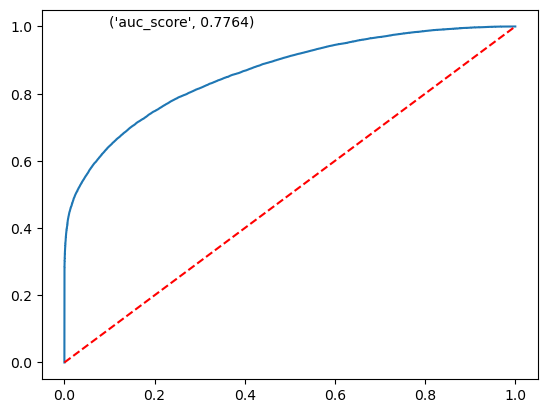

In [5]:
model_catboost = CatBoostClassifier().fit(xtrain,ytrain)

model_performance(model_catboost , 'Catboost')

In [13]:
performance_df.style.apply(highlight_row,axis=1)

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Logistic Regression sklearn,67.000000,0.660000,66.000000,0.650000,0.670000,0.630000,0.721500,Good Fit
1,DecisionTree Model without tuning,100.000000,1.000000,69.000000,0.690000,0.700000,0.680000,0.690000,Over Fit
2,Random Forest without tuning,100.000000,1.000000,78.000000,0.760000,0.820000,0.720000,0.859100,Over Fit
3,AdaBoost without tuning,71.000000,0.710000,71.000000,0.710000,0.720000,0.690000,0.787000,Good Fit
4,GradientBoosting without tuning,75.000000,0.740000,75.000000,0.740000,0.770000,0.710000,0.826500,Good Fit
5,Neural Network,75.000000,0.740000,74.000000,0.720000,0.770000,0.680000,0.820100,Good Fit
6,Xtreme Gradient Boosting without tuning,79.000000,0.780000,77.000000,0.760000,0.810000,0.710000,0.857800,Good Fit
7,Catboost,80.000000,0.790000,78.000000,0.760000,0.810000,0.720000,0.862500,Good Fit


Train Report :
               precision    recall  f1-score   support

           0       0.73      0.79      0.76    114747
           1       0.77      0.71      0.74    114747

    accuracy                           0.75    229494
   macro avg       0.75      0.75      0.75    229494
weighted avg       0.75      0.75      0.75    229494

Test Report :
               precision    recall  f1-score   support

           0       0.70      0.76      0.73     49177
           1       0.74      0.68      0.71     49177

    accuracy                           0.72     98354
   macro avg       0.72      0.72      0.72     98354
weighted avg       0.72      0.72      0.72     98354



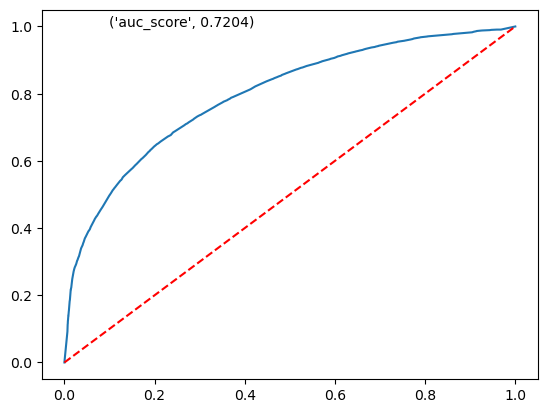

In [14]:
model_dtp = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_split = 8).fit(xtrain,ytrain)

model_performance(model_dtp , 'Decision Tree tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88    114747
           1       0.91      0.82      0.86    114747

    accuracy                           0.87    229494
   macro avg       0.87      0.87      0.87    229494
weighted avg       0.87      0.87      0.87    229494

Test Report :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79     49177
           1       0.82      0.73      0.77     49177

    accuracy                           0.78     98354
   macro avg       0.79      0.78      0.78     98354
weighted avg       0.79      0.78      0.78     98354



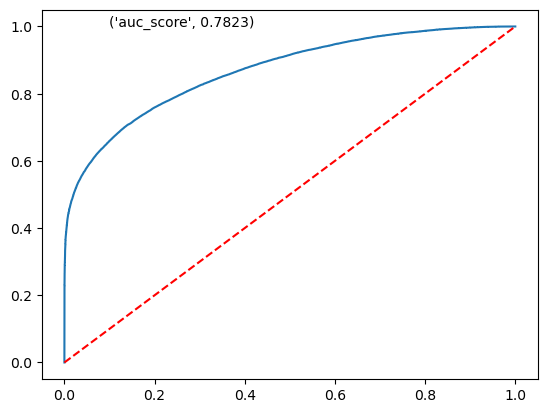

In [15]:
model_gbp = GradientBoostingClassifier(max_depth = 11, min_samples_split = 6).fit(xtrain,ytrain)

model_performance(model_gbp , 'GradientBoosting Classifier tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.67      0.71      0.69    114747
           1       0.69      0.65      0.67    114747

    accuracy                           0.68    229494
   macro avg       0.68      0.68      0.68    229494
weighted avg       0.68      0.68      0.68    229494

Test Report :
               precision    recall  f1-score   support

           0       0.67      0.71      0.69     49177
           1       0.69      0.65      0.67     49177

    accuracy                           0.68     98354
   macro avg       0.68      0.68      0.68     98354
weighted avg       0.68      0.68      0.68     98354



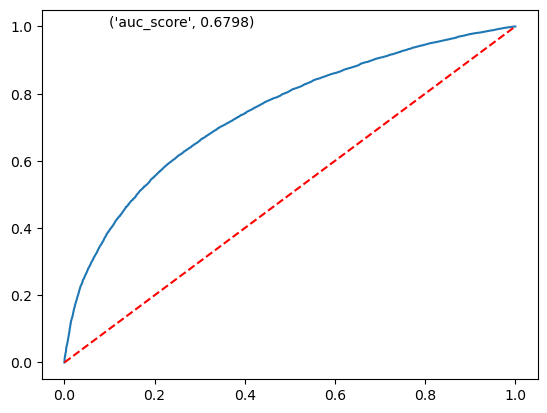

In [16]:
model_abp = AdaBoostClassifier(learning_rate = 0.1).fit(xtrain,ytrain)

model_performance(model_abp , 'AdaBoost Classifier tuned')

0:	learn: 0.6642197	total: 148ms	remaining: 29.4s
1:	learn: 0.6432553	total: 282ms	remaining: 27.9s
2:	learn: 0.6244045	total: 420ms	remaining: 27.6s
3:	learn: 0.6110902	total: 557ms	remaining: 27.3s
4:	learn: 0.5984378	total: 690ms	remaining: 26.9s
5:	learn: 0.5884791	total: 838ms	remaining: 27.1s
6:	learn: 0.5771039	total: 978ms	remaining: 27s
7:	learn: 0.5700910	total: 1.12s	remaining: 26.9s
8:	learn: 0.5616581	total: 1.26s	remaining: 26.8s
9:	learn: 0.5561527	total: 1.39s	remaining: 26.5s
10:	learn: 0.5523816	total: 1.53s	remaining: 26.3s
11:	learn: 0.5467514	total: 1.68s	remaining: 26.2s
12:	learn: 0.5409880	total: 1.83s	remaining: 26.3s
13:	learn: 0.5367954	total: 1.99s	remaining: 26.5s
14:	learn: 0.5339267	total: 2.15s	remaining: 26.6s
15:	learn: 0.5293713	total: 2.32s	remaining: 26.6s
16:	learn: 0.5270198	total: 2.46s	remaining: 26.5s
17:	learn: 0.5245858	total: 2.59s	remaining: 26.2s
18:	learn: 0.5205573	total: 2.73s	remaining: 26s
19:	learn: 0.5178126	total: 2.87s	remaining: 

162:	learn: 0.4268049	total: 23.1s	remaining: 5.25s
163:	learn: 0.4264756	total: 23.2s	remaining: 5.1s
164:	learn: 0.4261599	total: 23.4s	remaining: 4.96s
165:	learn: 0.4257181	total: 23.5s	remaining: 4.82s
166:	learn: 0.4253365	total: 23.7s	remaining: 4.68s
167:	learn: 0.4249829	total: 23.8s	remaining: 4.53s
168:	learn: 0.4246142	total: 23.9s	remaining: 4.39s
169:	learn: 0.4243685	total: 24.1s	remaining: 4.25s
170:	learn: 0.4240446	total: 24.2s	remaining: 4.11s
171:	learn: 0.4236694	total: 24.4s	remaining: 3.96s
172:	learn: 0.4234467	total: 24.5s	remaining: 3.82s
173:	learn: 0.4231133	total: 24.6s	remaining: 3.68s
174:	learn: 0.4226500	total: 24.8s	remaining: 3.54s
175:	learn: 0.4224601	total: 24.9s	remaining: 3.4s
176:	learn: 0.4221289	total: 25.1s	remaining: 3.26s
177:	learn: 0.4218989	total: 25.2s	remaining: 3.11s
178:	learn: 0.4215268	total: 25.4s	remaining: 2.97s
179:	learn: 0.4211320	total: 25.5s	remaining: 2.83s
180:	learn: 0.4208388	total: 25.7s	remaining: 2.69s
181:	learn: 0.

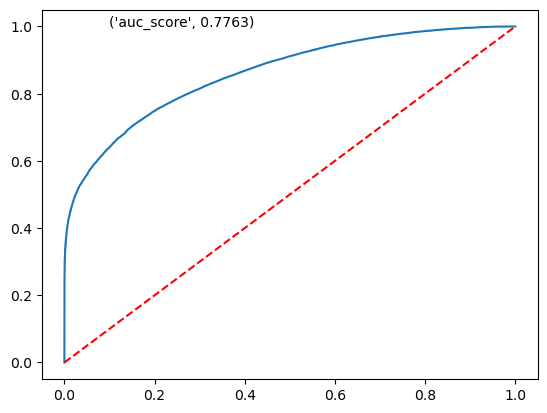

In [19]:
model_catb = cb.CatBoostClassifier(iterations=200, learning_rate=0.1, depth=10, loss_function='Logloss')
model_catb.fit(xtrain, ytrain)
model_performance(model_catb , 'Cat Boost Tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.76    114747
           1       0.77      0.71      0.74    114747

    accuracy                           0.75    229494
   macro avg       0.75      0.75      0.75    229494
weighted avg       0.75      0.75      0.75    229494

Test Report :
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     49177
           1       0.75      0.70      0.73     49177

    accuracy                           0.74     98354
   macro avg       0.74      0.74      0.74     98354
weighted avg       0.74      0.74      0.74     98354



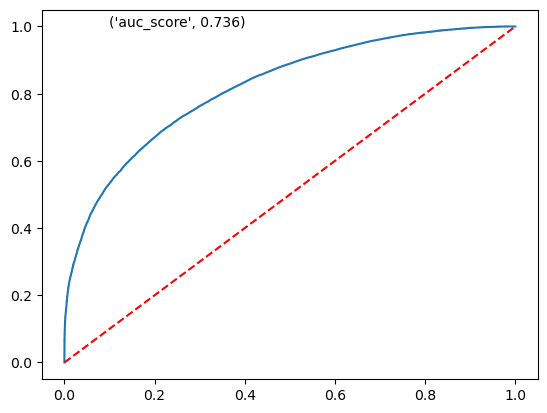

In [24]:

model_dt_tuned_1 =RandomForestClassifier(criterion = 'entropy',
                                       max_depth = 10,
                                       min_samples_split = 9,
                                         max_features = 16
                                       ).fit(xtrain,ytrain)

model_performance(model_dt_tuned_1,name = 'Random forest Model tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79    114747
           1       0.81      0.72      0.76    114747

    accuracy                           0.77    229494
   macro avg       0.78      0.77      0.77    229494
weighted avg       0.78      0.77      0.77    229494

Test Report :
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     49177
           1       0.80      0.71      0.75     49177

    accuracy                           0.77     98354
   macro avg       0.77      0.77      0.77     98354
weighted avg       0.77      0.77      0.77     98354



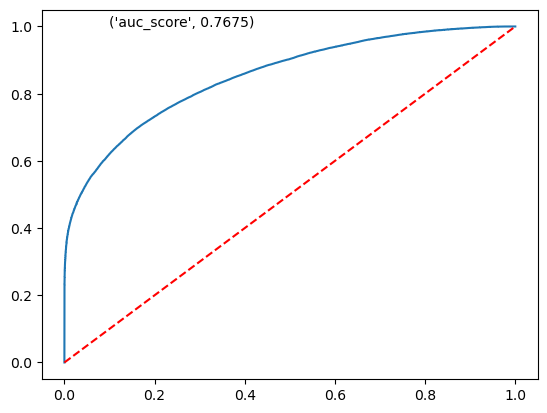

In [22]:
# XGB with tuning

model_xgbt = XGBClassifier(n_estimators=150,
    learning_rate=0.1,
    random_state=42).fit(xtrain,ytrain)

model_performance(model_xgbt,'Xtreme Gradient Boosting tuned')

In [25]:
performance_df.style.apply(highlight_row,axis=1)

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Logistic Regression sklearn,67.000000,0.660000,66.000000,0.650000,0.670000,0.630000,0.721500,Good Fit
1,DecisionTree Model without tuning,100.000000,1.000000,69.000000,0.690000,0.700000,0.680000,0.690000,Over Fit
2,Random Forest without tuning,100.000000,1.000000,78.000000,0.760000,0.820000,0.720000,0.859100,Over Fit
3,AdaBoost without tuning,71.000000,0.710000,71.000000,0.710000,0.720000,0.690000,0.787000,Good Fit
4,GradientBoosting without tuning,75.000000,0.740000,75.000000,0.740000,0.770000,0.710000,0.826500,Good Fit
5,Neural Network,75.000000,0.740000,74.000000,0.720000,0.770000,0.680000,0.820100,Good Fit
6,Xtreme Gradient Boosting without tuning,79.000000,0.780000,77.000000,0.760000,0.810000,0.710000,0.857800,Good Fit
7,Catboost,80.000000,0.790000,78.000000,0.760000,0.810000,0.720000,0.862500,Good Fit
8,Decision Tree tuned,75.000000,0.740000,72.000000,0.710000,0.740000,0.680000,0.796100,Good Fit
9,GradientBoosting Classifier tuned,87.000000,0.860000,78.000000,0.770000,0.820000,0.730000,0.867700,Over Fit


In [7]:
import pickle

In [8]:
with open('Cat_boost.pkl','wb') as file:
    pickle.dump(model_catboost,file)